In [ ]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dropout, Dense
from tensorflow.keras.models import Model

In [ ]:
# Load in the data
fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_test = X_train / 255.0 , X_test / 255.0
print("X_train.shape :", X_train.shape)

4423680/4422102 [==============================] - 0s 0us/step
X_train.shape : (60000, 28, 28)


In [ ]:
# The data is 2D
# Convulation only expects height x width x color
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print(X_train.shape)

(60000, 28, 28, 1)


In [ ]:
print(X_test.shape)

(10000, 28, 28, 1)


In [ ]:
print(y_train.shape)

(60000,)


In [ ]:
# Number of classes
K = len(set(y_train))
print("Number of Classes :", K)

Number of Classes : 10


In [ ]:
# Build the model using the Functional API
i = Input(shape=X_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [ ]:
X_train[0].shape

(28, 28, 1)

In [ ]:
# Compile and fit
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 16s 5ms/step - loss: 0.7036 - accuracy: 0.7416 - val_loss: 0.4155 - val_accuracy: 0.8474
Epoch 2/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3811 - accuracy: 0.8582 - val_loss: 0.3638 - val_accuracy: 0.8636
Epoch 3/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3206 - accuracy: 0.8807 - val_loss: 0.3229 - val_accuracy: 0.8822
Epoch 4/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2813 - accuracy: 0.8929 - val_loss: 0.3117 - val_accuracy: 0.8854
Epoch 5/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2540 - accuracy: 0.9034 - val_loss: 0.3063 - val_accuracy: 0.8927
Epoch 6/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2308 - accuracy: 0.9112 - val_loss: 0.2950 - val_accuracy: 0.8978
Epoch 7/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2113 - accuracy: 0.9200 - val_loss: 0.3068 - val_accuracy

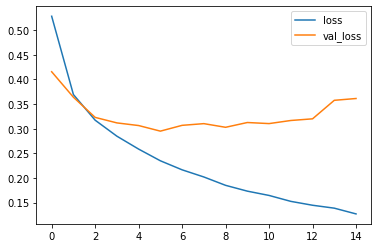

In [ ]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

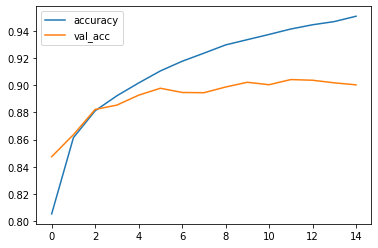

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
# Label Mapping
labels= '''T-Shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle Boot'''.split("\n")

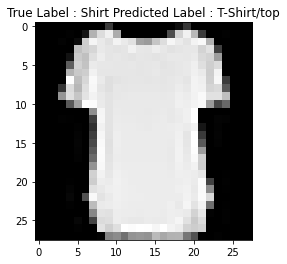

In [ ]:
p_test = model.predict(X_test).argmax(axis=1)
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
plt.title("True Label : %s Predicted Label : %s" % (labels[y_test[i]], labels[p_test[i]]));

Confusion matrix, without normalization
[[879   2  28  14   3   1  67   0   6   0]
 [  1 981   2  12   1   0   1   0   2   0]
 [ 14   0 900   9  31   0  46   0   0   0]
 [ 17   5  19 920  23   1  14   0   1   0]
 [  1   2  93  39 797   0  68   0   0   0]
 [  0   0   0   0   0 982   0   9   0   9]
 [136   1  85  23  86   0 660   0   9   0]
 [  0   0   0   0   0  21   0 952   0  27]
 [  3   2   6   2   4   3   5   3 972   0]
 [  1   0   0   0   0   6   0  32   1 960]]


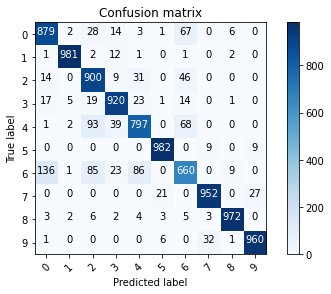

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


# p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))